# Boolean generator 1 (version 1):

Generating sentences of the form

- 1) **A, not A** (contradiction)
- 2) **not A, A** (contradiction)
- 3) **A, not B** (non-contradiction)
- 4) ** not B, A ** (non-contradiction)



In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, positive_personality_list, condition_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline


### Generating all types of propositions

### - 1) **A, not A** (contradiction)

In [2]:
template1 = itertools.product(name_list, positive_personality_list)
template1 = list(template1)
all_sentences_1 = ["{} is {}, {} is not {}".format(car,cdr,car,cdr) for car, cdr in template1]
all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]
np.random.shuffle(all_sentences_1)

print("Type 1 sentences:\n")
for sentence in all_sentences_1[0:10]:
    print(sentence)

Type 1 sentences:

['Nixon is aggressive', ' Nixon is not aggressive', 1]
['Tucker is lively', ' Tucker is not lively', 1]
['Vinny is faithful', ' Vinny is not faithful', 1]
['Earl is zealous', ' Earl is not zealous', 1]
['Lanford is happy', ' Lanford is not happy', 1]
['Wesley is nice', ' Wesley is not nice', 1]
['Cody is agreeable', ' Cody is not agreeable', 1]
['Cole is faithful', ' Cole is not faithful', 1]
['Jones is gentle', ' Jones is not gentle', 1]
['Lord is witty', ' Lord is not witty', 1]


### - 2) **not A, A** (contradiction)

In [3]:
template2 = itertools.product(name_list,condition_list)
template2 = list(template2)
all_sentences_2 = ["{} is not {}, {} is {}".format(car,cdr,car,cdr) for car, cdr in template2]
all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]
np.random.shuffle(all_sentences_2)

print("Type 2 sentences:\n")
for sentence in all_sentences_2[0:10]:
    print(sentence)

Type 2 sentences:

['Bradley is not poor', ' Bradley is poor', 1]
['Bristol is not uninterested', ' Bristol is uninterested', 1]
['Trey is not mealy', ' Trey is mealy', 1]
['James is not uninterested', ' James is uninterested', 1]
['Gore is not careful', ' Gore is careful', 1]
['Nell is not famous', ' Nell is famous', 1]
['Bean is not inexpensive', ' Bean is inexpensive', 1]
['Simpson is not unimportant', ' Simpson is unimportant', 1]
['Madisyn is not uninterested', ' Madisyn is uninterested', 1]
['Everet is not shy', ' Everet is shy', 1]


### - 3) **A, not B** (non-contradiction)

In [4]:
template_triple = itertools.product(name_list, positive_personality_list, condition_list)
template_triple = list(template_triple)
all_sentences_3 = ["{} is {}, {} is not {}".format(car,cdr,car,cddr) for car, cdr, cddr in template_triple]

np.random.shuffle(template_triple)

template3 = template_triple[0:2750]

all_sentences_3 = []

for triple in template3:
    new_name = triple[0]
    while new_name == triple[0]:
        i = np.random.choice(len(name_list))
        new_name = name_list[i]
    car, cdr, cddr = triple 
    all_sentences_3.append("{} is {}, {} is not {}".format(car,cdr,new_name,cddr))

all_sentences_3 = [ sentence.split(",") + [0] for sentence in all_sentences_3]    
    
np.random.shuffle(all_sentences_3)

print("Type 3 sentences:\n")
for sentence in all_sentences_3[0:10]:
    print(sentence)

Type 3 sentences:

['Joan is polite', ' Twila is not mushy', 0]
['Holt is agreeable', ' Shadow is not unimportant', 0]
['Posy is faithful', ' Kendrick is not shy', 0]
['Ivory is eager', ' Darla is not wrong', 0]
['Beowulf is delightful', ' Poe is not mealy', 0]
['Kinsey is witty', ' Ellery is not alive', 0]
['Lark is happy', ' Talbot is not easy', 0]
['Newell is faithful', ' Eldred is not vast', 0]
['Discovery is witty', ' Carleton is not rich', 0]
['Harper is aggressive', ' Elmore is not uninterested', 0]


### - 4) ** not B, A ** (non-contradiction)

In [5]:
np.random.shuffle(template_triple)

template4 = template_triple[0:2750]

all_sentences_4 = []

for triple in template4:
    new_name = triple[0]
    while new_name == triple[0]:
        i = np.random.choice(len(name_list))
        new_name = name_list[i]
    car, cdr, cddr = triple 
    all_sentences_4.append("{} is not {}, {} is {}".format(car,cdr,new_name,cddr))

all_sentences_4 = [ sentence.split(",") + [0] for sentence in all_sentences_4]    
    
np.random.shuffle(all_sentences_4)

print("Type 4 sentences:\n")
for sentence in all_sentences_4[0:10]:
    print(sentence)

Type 4 sentences:

['Dryden is not polite', ' Gore is helpful', 0]
['Georgina is not agreeable', ' Marlon is better', 0]
['Lettie is not nice', ' Beacon is gifted', 0]
['Kendall is not nice', ' Maxfield is alive', 0]
['Peel is not thankful', ' Quince is helpful', 0]
['Lucy is not delightful', ' Cannon is easy', 0]
['Bayard is not eager', ' Grover is important', 0]
['Drummer is not brave', ' Corby is odd', 0]
['Halsey is not kind', ' Brawley is famous', 0]
['Quilla is not obedient', ' Averill is careful', 0]


In [6]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)

all_sentences_1 = all_sentences_1[0:2750]
all_sentences_2 = all_sentences_2[0:2750]


size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4

size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [7]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()

,sentence1,sentence2,label
10995,Armstrong is wonderful,Randolph is not shy,0
10996,Craven is proud,Selby is not poor,0
10997,Acker is happy,Acker is not happy,1
10998,Everly is lively,Everly is not lively,1
10999,Tuesday is not lively,Barron is gifted,0


#### Looking at the label distribution

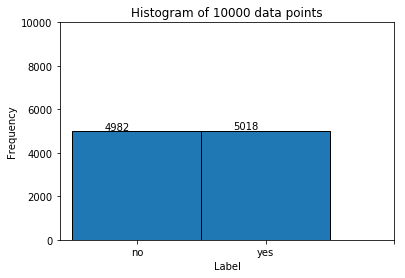

In [8]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "b1_train.png")

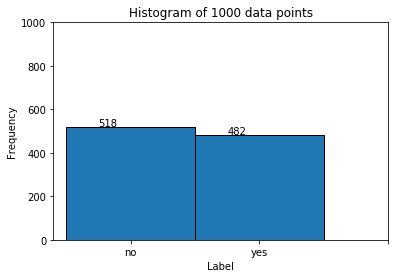

In [9]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "b1_test.png")

### Saving to CSV

In [10]:
df_train.to_csv("b1_v1_train.csv", index=False)
df_test.to_csv("b1_v1_test.csv", index=False)